In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [45]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [46]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [47]:
x.shape,y.shape

((10, 1), (10,))

In [48]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree, learning_rate, iterations, alpha=0.01):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Regularization parameter

    def transform(self, x):
        x_transform = np.ones((self.m, 1))
        for j in range(1, self.degree + 1):
            x_pow = np.power(x, j)
            x_transform = np.append(x_transform, x_pow.reshape(-1, 1), axis=1)
        return x_transform

    def normalize(self, x):
        x_mean = np.mean(x, axis=0)
        x_std = np.std(x, axis=0)
        x_std[x_std == 0] = 1  # Avoid division by zero
        x_normalized = (x - x_mean) / x_std
        return x_normalized

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m, self.n = self.x.shape

        self.w = np.zeros(self.degree + 1)

        x_transform = self.transform(self.x)
        x_normalize = self.normalize(x_transform)

        for _ in range(self.iterations):
            predictions = self.predict(self.x)
            error = predictions - self.y

            # Regularization term (skip regularization for the bias term)
            regularization_term = (self.alpha / self.m) * np.concatenate(([0], self.w[1:]))

            # Update weights with regularization
            self.w = self.w - self.learning_rate * (1 / self.m) * (np.dot(x_normalize.T, error) + regularization_term)

        return self

    def predict(self, x):
        x_transform = self.transform(x)
        x_normalize = self.normalize(x_transform)

        return np.dot(x_normalize, self.w)


In [54]:
model = PolynomialRegression(degree=2, learning_rate=0.1, iterations=500, alpha=0.01)
model.fit(x, y)
predictions = model.predict(x)
print(predictions)

[-189076.68761098 -227294.39207201 -235424.0667259  -213465.71157266
 -161419.32661229  -79284.91184478   32937.53272986  175248.00711163
  347646.51130054  550133.04529659]


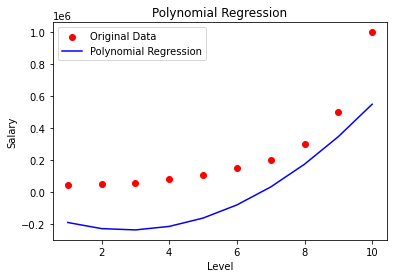

In [50]:
plt.scatter(x, y, color='red', label='Original Data')
plt.plot(x, predictions, color='blue', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()